In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import datetime
import os
from pathlib import Path

In [2]:
p = Path.cwd()
data_folder = p.parent / "data"
file_path = data_folder / "ConsumoEnergeticoCompleto.parquet"

CodPost = pd.read_parquet(file_path)

In [3]:
CodPost.columns

Index(['Data/Hora', 'Código Postal', 'Energia ativa (kWh)', 'Data', 'Hora',
       'Código Postal 4 Dígitos', 'Código Postal 3 Dígitos', 'Distrito',
       'Concelho', 'Freguesia'],
      dtype='object')

In [4]:
CodPost['Data'] = pd.to_datetime(CodPost['Data'])
CodPost['Ano'] = CodPost['Data'].dt.year
CodPost['Mes'] = CodPost['Data'].dt.month
CodPost['Dia'] = CodPost['Data'].dt.day

In [5]:
CodPost

,Data/Hora,Código Postal,Energia ativa (kWh),Data,Hora,Código Postal 4 Dígitos,Código Postal 3 Dígitos,Distrito,Concelho,Freguesia,Ano,Mes,Dia
0,2023-08-11T07:00:00+01:00,1950-071,4.863232,2023-08-11,06:00,1950,71,Lisboa,Lisboa,Marvila,2023,8,11
1,2023-08-07T03:00:00+01:00,1150-117,3.406129,2023-08-07,02:00,1150,117,Lisboa,Lisboa,Pena,2023,8,7
2,2023-08-25T03:00:00+01:00,1000-258,6.585341,2023-08-25,02:00,1000,258,Lisboa,Lisboa,São Jorge de Arroios,2023,8,25
3,2023-08-15T17:00:00+01:00,1700-067,240.946953,2023-08-15,16:00,1700,67,Lisboa,Lisboa,São João de Brito,2023,8,15
4,2023-08-21T04:00:00+01:00,1000-035,3.124270,2023-08-21,03:00,1000,35,Lisboa,Lisboa,São Jorge de Arroios,2023,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52256038,2023-08-10T21:00:00+01:00,8125-538,9.381257,2023-08-10,20:00,8125,538,Faro,Loulé,Quarteira,2023,8,10
52256039,2023-08-12T12:00:00+01:00,8125-403,1036.066409,2023-08-12,11:00,8125,403,Faro,Loulé,Quarteira,2023,8,12
52256040,2023-08-08T23:00:00+01:00,7875-385,9.419000,2023-08-08,22:00,7875,385,Beja,Moura,Sobral da Adiça,2023,8,8
52256041,2023-08-19T02:00:00+01:00,8600-117,155.659302,2023-08-19,01:00,8600,117,Faro,Lagos,Luz,2023,8,19


## Ideias

### Consumo diário

In [6]:
CodPost['Dia'].unique()

array([11,  7, 25, 15, 21,  6, 13, 18, 31,  5, 16,  2, 30, 19, 22, 24, 17,
       27, 28,  3, 23,  9, 20, 12, 14, 26, 29, 10,  1,  4,  8])

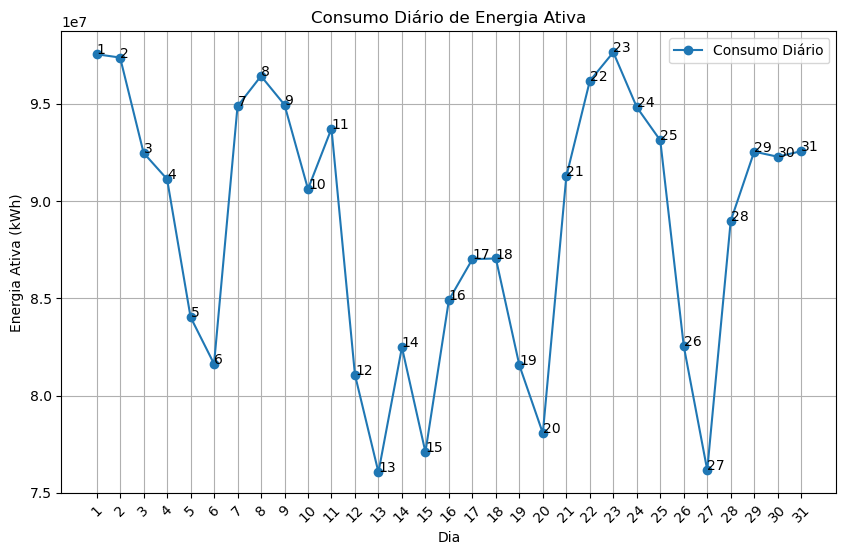

In [7]:
# Agrupar por data e calcular o consumo diário
consumo_diario = CodPost.groupby('Dia')['Energia ativa (kWh)'].sum().reset_index()
consumo_diario.index = consumo_diario.index + 1

# Criar o lineplot
plt.figure(figsize=(10, 6))
plt.plot(consumo_diario['Dia'], consumo_diario['Energia ativa (kWh)'], marker='o', linestyle='-', label='Consumo Diário')

for i, txt in enumerate(consumo_diario['Dia']):
    plt.annotate(txt, (consumo_diario['Dia'].iloc[i], consumo_diario['Energia ativa (kWh)'].iloc[i]))

plt.xticks(consumo_diario['Dia'])

plt.title('Consumo Diário de Energia Ativa')
plt.xlabel('Dia')
plt.ylabel('Energia Ativa (kWh)')
plt.xticks(rotation=45)
plt.legend()  # Adicionar a legenda
plt.grid(True)
plt.show()


### Concelho de Lisboa

In [8]:
Lisbon = CodPost[CodPost["Freguesia"] == "Cascais"]
Lisbon

,Data/Hora,Código Postal,Energia ativa (kWh),Data,Hora,Código Postal 4 Dígitos,Código Postal 3 Dígitos,Distrito,Concelho,Freguesia,Ano,Mes,Dia
12494221,2023-08-02T01:00:00+01:00,2750-505,11.545532,2023-08-02,00:00,2750,505,Lisboa,Lisboa,Cascais,2023,8,2
12494247,2023-08-12T00:00:00+01:00,2750-749,17.855915,2023-08-11,23:00,2750,749,Lisboa,Lisboa,Cascais,2023,8,11
12494254,2023-08-05T15:00:00+01:00,2750-401,28.012916,2023-08-05,14:00,2750,401,Lisboa,Lisboa,Cascais,2023,8,5
12494262,2023-08-17T13:00:00+01:00,2750-775,15.627000,2023-08-17,12:00,2750,775,Lisboa,Lisboa,Cascais,2023,8,17
12494283,2023-08-27T10:00:00+01:00,2750-636,7.267000,2023-08-27,09:00,2750,636,Lisboa,Lisboa,Cascais,2023,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864549,2023-08-06T07:00:00+01:00,2750-109,2.987787,2023-08-06,06:00,2750,109,Lisboa,Lisboa,Cascais,2023,8,6
16864554,2023-08-04T10:00:00+01:00,2750-629,22.506265,2023-08-04,09:00,2750,629,Lisboa,Lisboa,Cascais,2023,8,4
16864564,2023-08-26T19:00:00+01:00,2750-178,265.324702,2023-08-26,18:00,2750,178,Lisboa,Lisboa,Cascais,2023,8,26
16864573,2023-08-26T23:00:00+01:00,2750-696,18.183494,2023-08-26,22:00,2750,696,Lisboa,Lisboa,Cascais,2023,8,26


In [9]:
Cascais = Lisbon.groupby(['Hora', 'Dia'])['Energia ativa (kWh)'].sum().reset_index()
Cascais

,Hora,Dia,Energia ativa (kWh)
0,00:00,1,13321.056262
1,00:00,2,13444.662036
2,00:00,3,13238.869283
3,00:00,4,12754.043967
4,00:00,5,13281.610271
...,...,...,...
739,23:00,27,14016.533256
740,23:00,28,14316.171013
741,23:00,29,14546.925591
742,23:00,30,14568.754279


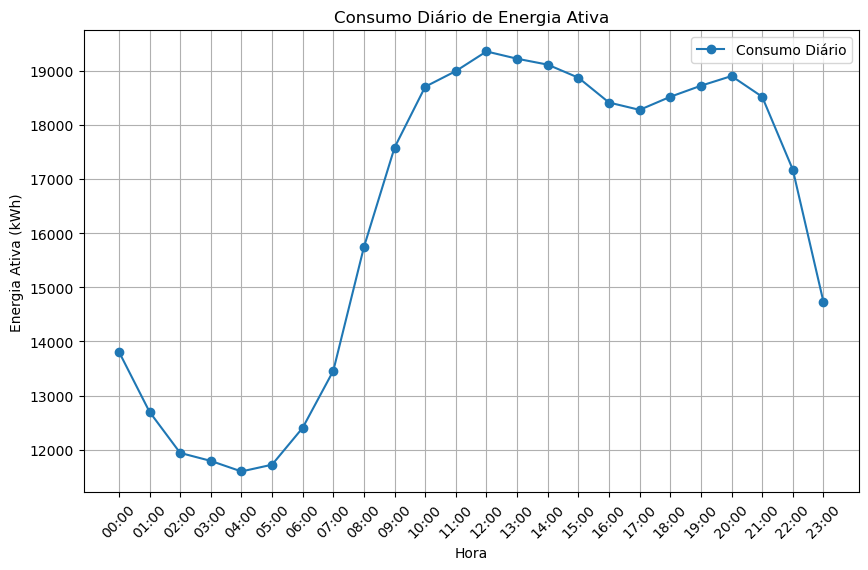

In [10]:
plt.figure(figsize=(10, 6))
CascaisPlot = Cascais[Cascais["Dia"]==9]
plt.plot(CascaisPlot['Hora'], CascaisPlot['Energia ativa (kWh)'], marker='o', linestyle='-', label='Consumo Diário')

# for i, txt in enumerate(CascaisPlot['Hora']):
#     plt.annotate(txt, (CascaisPlot['Hora'].iloc[i], CascaisPlot['Energia ativa (kWh)'].iloc[i]))

plt.xticks(CascaisPlot['Hora'])

plt.title('Consumo Diário de Energia Ativa')
plt.xlabel('Hora')
plt.ylabel('Energia Ativa (kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

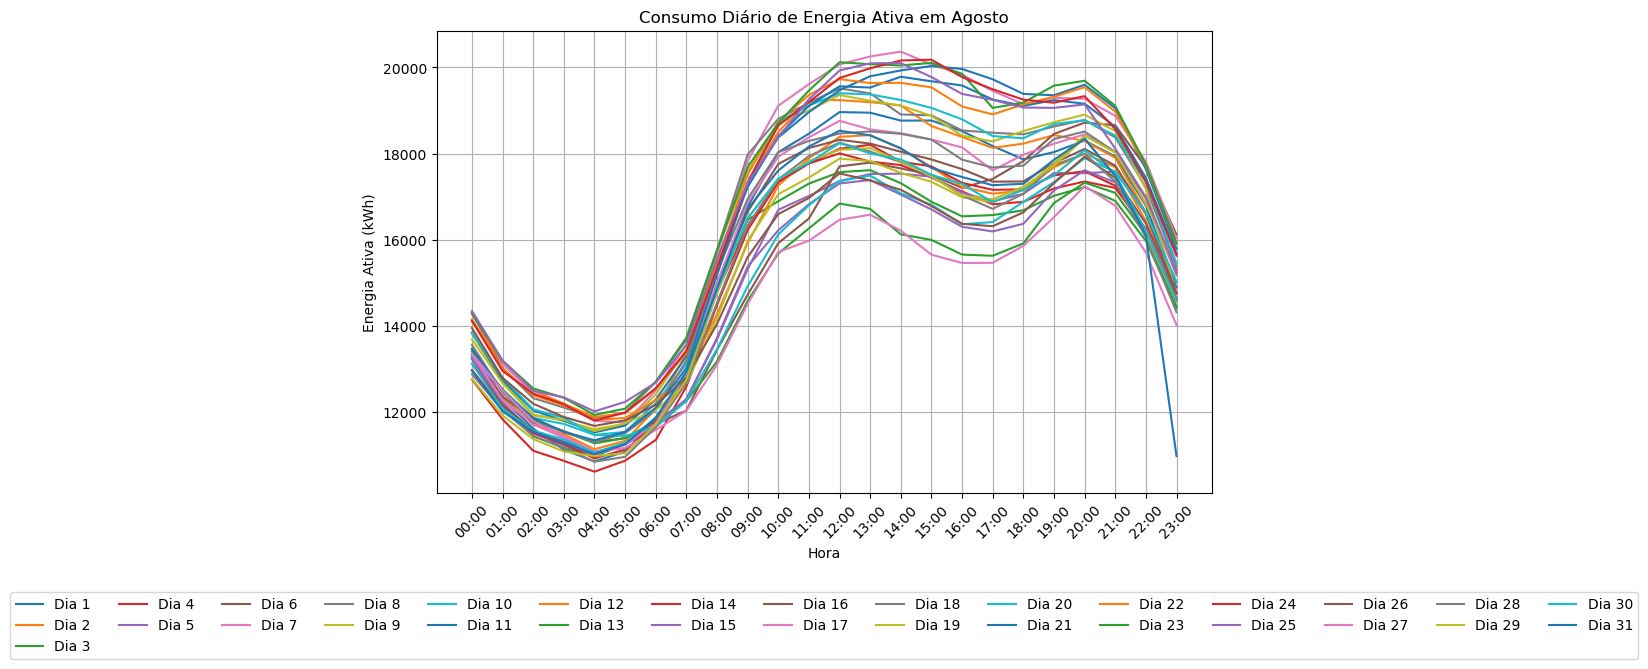

In [11]:
dias_de_agosto = range(1, 32) 
plt.figure(figsize=(10, 6))

for dia in dias_de_agosto:
    CascaisPlot = Cascais[Cascais["Dia"] == dia]
    plt.plot(CascaisPlot['Hora'], CascaisPlot['Energia ativa (kWh)'], label=f'Dia {dia}')

plt.title('Consumo Diário de Energia Ativa em Agosto')
plt.xlabel('Hora')
plt.ylabel('Energia Ativa (kWh)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=len(dias_de_agosto)//2)
plt.grid(True)
plt.show()


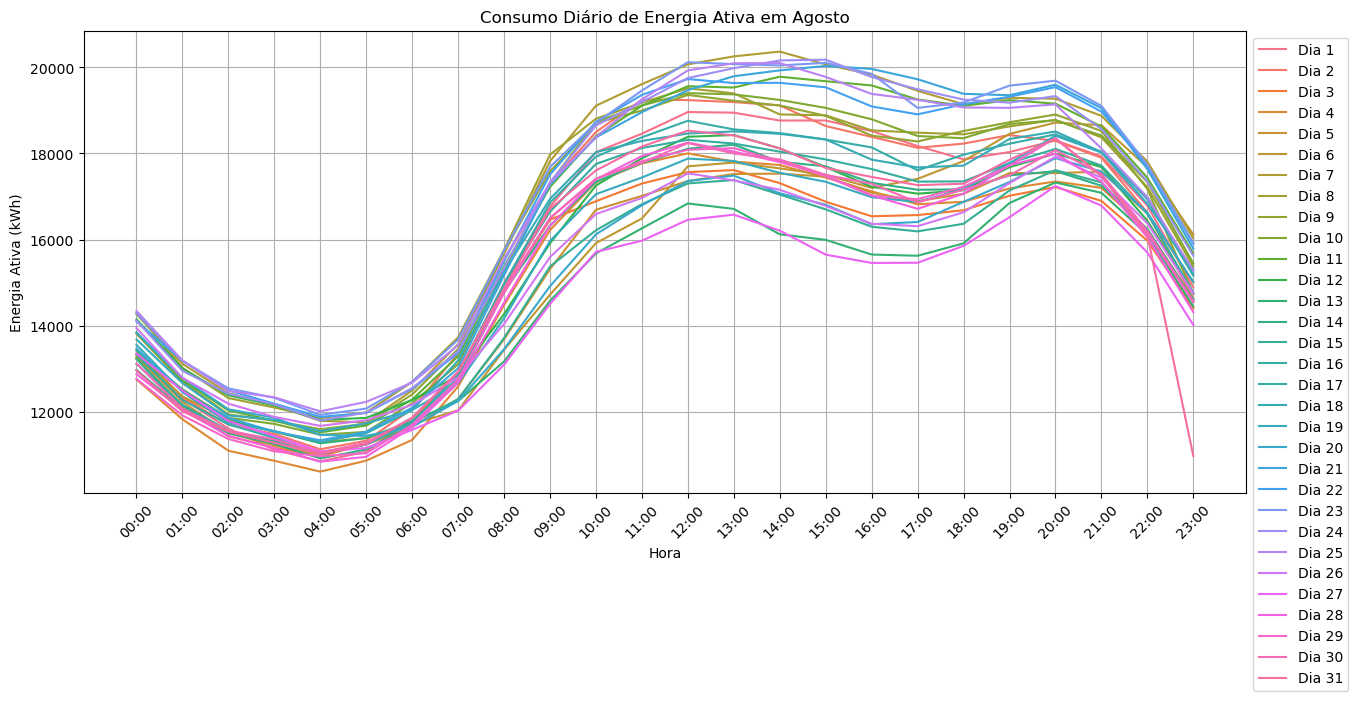

In [12]:
dias_de_agosto = range(1, 32)  # supondo que agosto tenha 31 dias

plt.figure(figsize=(15, 6))

# Usar uma paleta de cores do seaborn
cores = sns.color_palette("husl", n_colors=len(dias_de_agosto))

for i, dia in enumerate(dias_de_agosto):
    CascaisPlot = Cascais[Cascais["Dia"] == dia]
    plt.plot(CascaisPlot['Hora'], CascaisPlot['Energia ativa (kWh)'], label=f'Dia {dia}', color=cores[i])

# Adicionar uma legenda única
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Consumo Diário de Energia Ativa em Agosto')
plt.xlabel('Hora')
plt.ylabel('Energia Ativa (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [13]:
# Converter a coluna 'Hora' para tipo datetime
Cascais['Hora'] = pd.to_datetime(Cascais['Hora'], format='%H:%M').dt.hour

# Ordenar os dados pela combinação de Dia e Hora
cascais_ordenado = Cascais.sort_values(by=['Dia', 'Hora'])
cascais_ordenado

,Hora,Dia,Energia ativa (kWh)
0,0,1,13321.056262
31,1,1,12304.731399
62,2,1,11611.577792
93,3,1,11120.796171
124,4,1,10851.138987
...,...,...,...
619,19,31,17854.006355
650,20,31,18345.340901
681,21,31,17482.014885
712,22,31,16103.250972


In [14]:
cascais_ordenado

,Hora,Dia,Energia ativa (kWh)
0,0,1,13321.056262
31,1,1,12304.731399
62,2,1,11611.577792
93,3,1,11120.796171
124,4,1,10851.138987
...,...,...,...
619,19,31,17854.006355
650,20,31,18345.340901
681,21,31,17482.014885
712,22,31,16103.250972


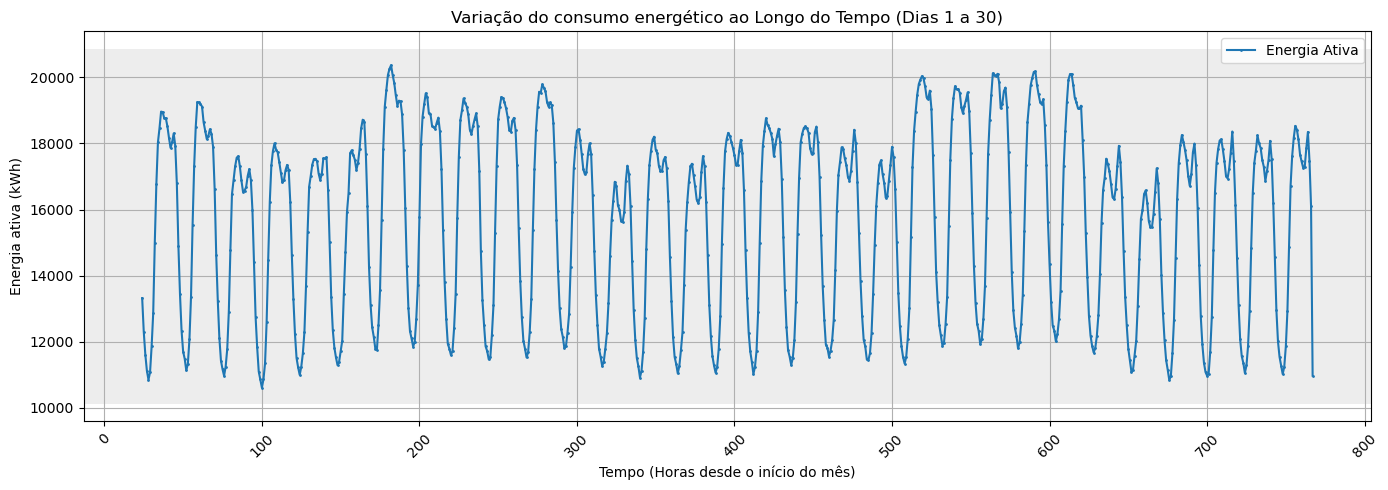

In [15]:
# Criar um gráfico de linha contínua
plt.figure(figsize=(14, 5))
plt.plot(cascais_ordenado['Dia'] * 24 + cascais_ordenado['Hora'], cascais_ordenado['Energia ativa (kWh)'], marker='o', linestyle='-', markersize=1, label='Energia Ativa')

# Adicione rótulos e título ao gráfico
plt.title('Variação do consumo energético ao Longo do Tempo (Dias 1 a 30)')
plt.xlabel('Tempo (Horas desde o início do mês)')
plt.ylabel('Energia ativa (kWh)')

# Adicione grades e ajuste a rotação dos rótulos no eixo x
plt.xticks(rotation=45)
plt.grid(True)

# Adicione uma legenda
plt.legend()

# Adicione um fundo colorido para destacar a área do gráfico
plt.axhspan(plt.ylim()[0], plt.ylim()[1], facecolor='lightgrey', alpha=0.4)

plt.savefig('ConsumoEnergeticoCascaisAgostoInteiro.svg')

# Exiba o gráfico
plt.tight_layout()
plt.show()